In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#read the data

In [5]:
raw_data <- read_csv("groupproject/pulsarstar.csv", col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



In [6]:
head(raw_data)

X1,X2,X3,X4,X5,X6,X7,X8,X9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


In [7]:
#adding column names manually

In [8]:
raw_data <- rename(raw_data,
       Mean_IP = X1,
       SD_IP = X2,
       ExcessKurtosis_IP = X3,
       Skewness_IP = X4,
       Mean_DS = X5,
       SD_DS = X6,
       ExcessKurtosis_DS = X7,
       Skewness_DS = X8, )

In [20]:
raw_data <- rename(raw_data,
        Class = X9)

In [21]:
head(raw_data)

Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Skewness_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


In [22]:
glimpse(raw_data)

Rows: 17,898
Columns: 9
$ Mean_IP           <dbl> 140.56250, 102.50781, 103.01562, 136.75000, 88.7265…
$ SD_IP             <dbl> 55.68378, 58.88243, 39.34165, 57.17845, 40.67223, 4…
$ ExcessKurtosis_IP <dbl> -0.23457141, 0.46531815, 0.32332837, -0.06841464, 0…
$ Skewness_IP       <dbl> -0.69964840, -0.51508791, 1.05116443, -0.63623837, …
$ Mean_DS           <dbl> 3.1998328, 1.6772575, 3.1212375, 3.6429766, 1.17892…
$ SD_DS             <dbl> 19.110426, 14.860146, 21.744669, 20.959280, 11.4687…
$ ExcessKurtosis_DS <dbl> 7.975532, 10.576487, 7.735822, 6.896499, 14.269573,…
$ Skewness_DS       <dbl> 74.24222, 127.39358, 63.17191, 53.59366, 252.56731,…
$ Class             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [23]:
#removing rows with missing values for the first 8 columns

In [24]:
na.omit(raw_data, cols=c("Mean_IP", "SD_IP", "ExcessKurtosis_IP", "Skewness_IP", "Mean_DS", "SD_DS", "ExcessKurtosis_DS", "Skewness_DS"))

Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Skewness_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


In [25]:
glimpse(raw_data)

Rows: 17,898
Columns: 9
$ Mean_IP           <dbl> 140.56250, 102.50781, 103.01562, 136.75000, 88.7265…
$ SD_IP             <dbl> 55.68378, 58.88243, 39.34165, 57.17845, 40.67223, 4…
$ ExcessKurtosis_IP <dbl> -0.23457141, 0.46531815, 0.32332837, -0.06841464, 0…
$ Skewness_IP       <dbl> -0.69964840, -0.51508791, 1.05116443, -0.63623837, …
$ Mean_DS           <dbl> 3.1998328, 1.6772575, 3.1212375, 3.6429766, 1.17892…
$ SD_DS             <dbl> 19.110426, 14.860146, 21.744669, 20.959280, 11.4687…
$ ExcessKurtosis_DS <dbl> 7.975532, 10.576487, 7.735822, 6.896499, 14.269573,…
$ Skewness_DS       <dbl> 74.24222, 127.39358, 63.17191, 53.59366, 252.56731,…
$ Class             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [26]:
#as we can observe above, row count remains the same meaning that there aren't any missing values 

In [27]:
#note to self, should i mutate averages of certain columns to look for outliers?

In [28]:
#Can we use gathered periodic radio signals to determine whether it's coming from radio frequency interference and noise 
#or from an actual pulsar star?

In [ ]:
#as we can see below, pulsar star observations are 9.15%

In [29]:
num_obs <- nrow(raw_data)

In [30]:
num_obs

[1] 17898

In [36]:
raw_data %>% 
    group_by(Class) %>% 
    summarize(
        count = n(),
        percentage = n() / num_obs * 100 
    )

raw_data

`summarise()` ungrouping output (override with `.groups` argument)



Class,count,percentage
<dbl>,<int>,<dbl>
0,16259,90.842552
1,1639,9.157448


Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Skewness_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


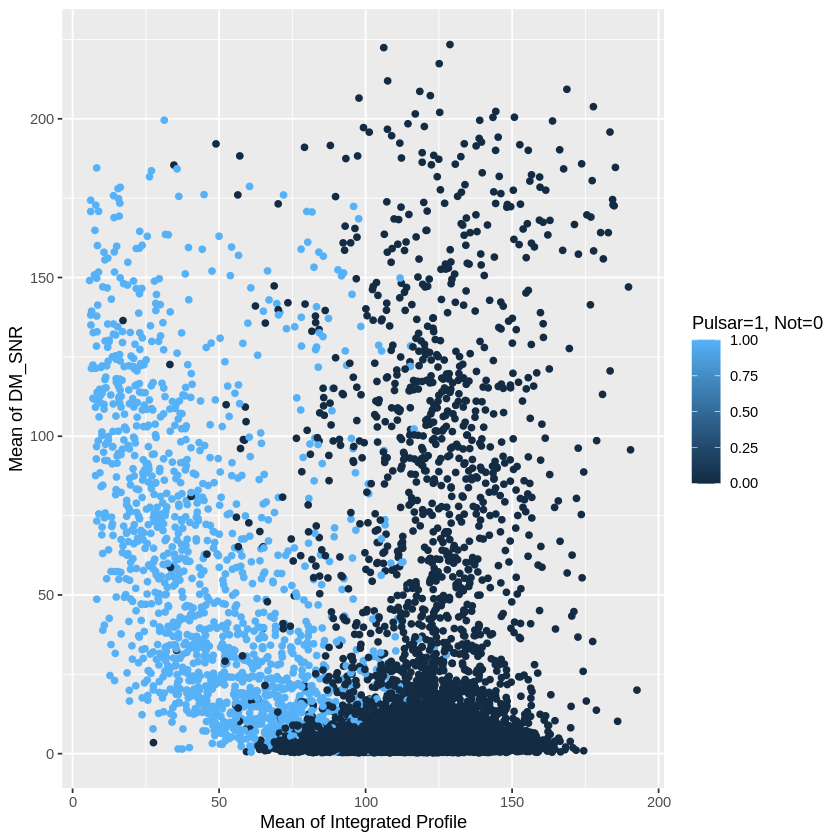

In [44]:
raw_data %>% 
    ggplot(aes(x= Mean_IP, y= Mean_DS, color = Class)) +
    geom_point() +
    labs(x = "Mean of Integrated Profile", 
       y = "Mean of DM_SNR",
       color = "Pulsar=1, Not=0") 

In [ ]:
#the smaller the mean of the integrated profile, more likely to be a pulsar

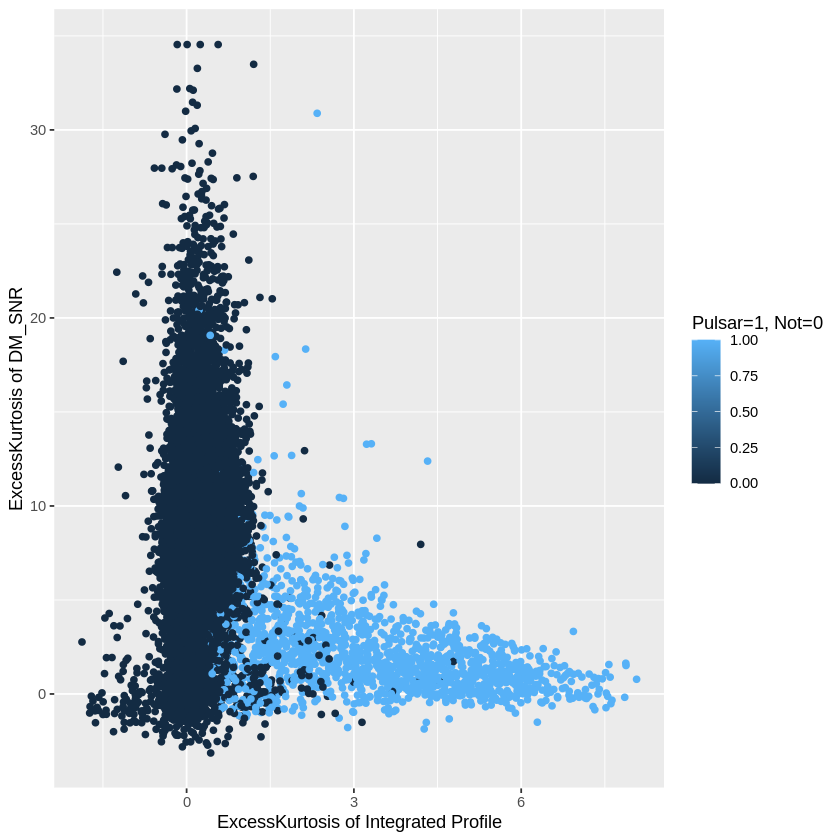

In [46]:
raw_data %>% 
    ggplot(aes(x= ExcessKurtosis_IP, y= ExcessKurtosis_DS, color = Class)) +
    geom_point() +
    labs(x = "ExcessKurtosis of Integrated Profile", 
       y = "ExcessKurtosis of DM_SNR",
       color = "Pulsar=1, Not=0") 

In [ ]:
#above: a threshold in the excess kurtosis measurement to determine whether it is pulsar or not?

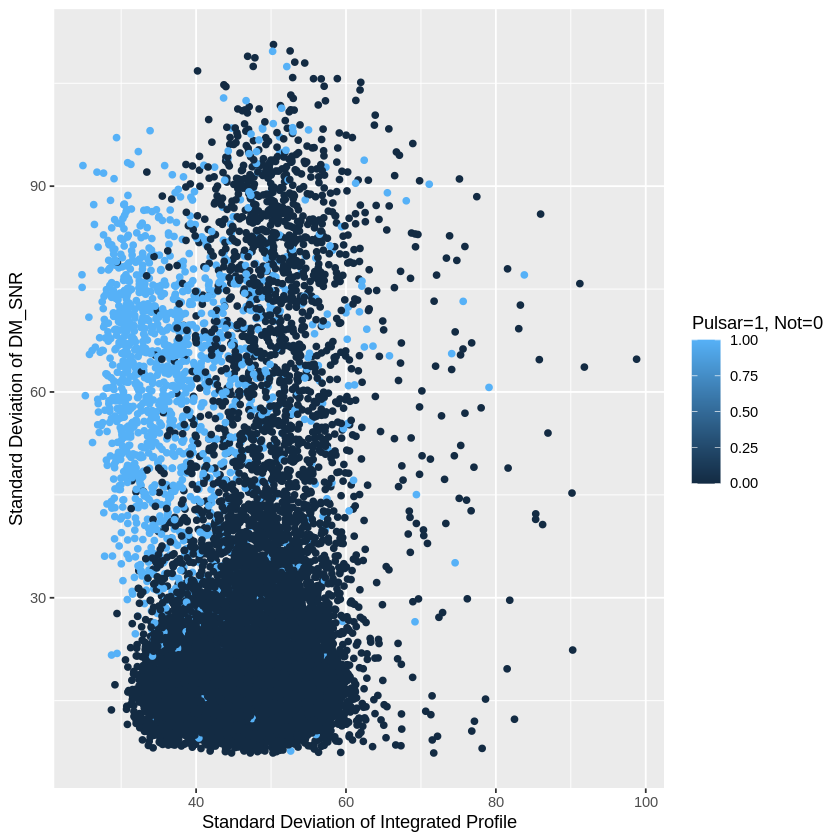

In [48]:
raw_data %>% 
    ggplot(aes(x= SD_IP, y= SD_DS, color = Class)) +
    geom_point() +
    labs(x = "Standard Deviation of Integrated Profile", 
       y = "Standard Deviation of DM_SNR",
       color = "Pulsar=1, Not=0") 

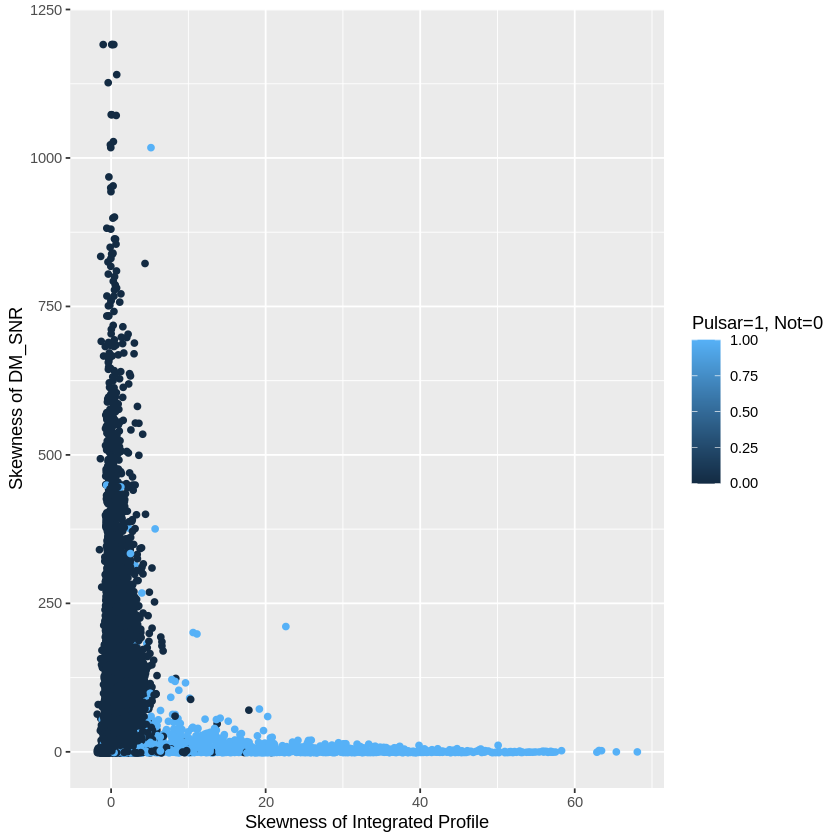

In [49]:
raw_data %>% 
    ggplot(aes(x= Skewness_IP, y= Skewness_DS, color = Class)) +
    geom_point() +
    labs(x = "Skewness of Integrated Profile", 
       y = "Skewness of DM_SNR",
       color = "Pulsar=1, Not=0") 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



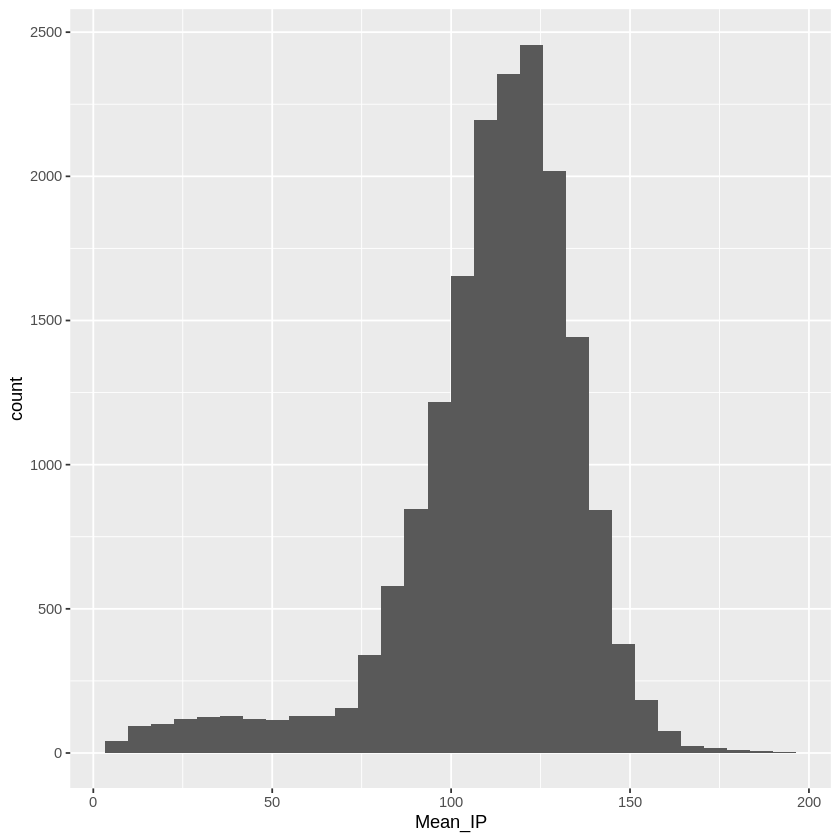

In [50]:
raw_data %>% 
    ggplot(aes(x= Mean_IP, color = Class)) +
    geom_histogram()

In [ ]:
#split the data into training and testing (maybe 80 to 20) - Han

In [ ]:
#use like an facet_ function to create a histogram for each variable to show distributions (with the training data)

In [ ]:
#make a seperate table where you mutate the average for each column (with the training data)

In [ ]:
#copy Koray's code to the training data (with the training data)

In [ ]:
#for visual purposes, mix all of the visualizations above by facet function

In [ ]:
#write the method